In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../mortalidade_2024.csv"
df = pd.read_csv(file_path, sep=";", encoding="latin1")

df.head()


,DATA_ÓBITO,NOME_REGIAO,NOME_REGIAO_SAUDE,MUNICIPIO,FAIXA_ETÁRIA,ESCOLARIDADE,SEXO,RACA,CID,ACIDENTES,QUANTIDADE
0,2023-12-31,CARIRI,18ª REGIÃO IGUATU,ACOPIARA,80 ou mais,Ignorado,FEMININO,Branca,Causas externas de morbidade e mortalidade,Outras causas,1
1,2023-12-31,CARIRI,18ª REGIÃO IGUATU,MOMBACA,20 a 29 anos,Fundamental I,MASCULINO,Não Informado,Causas externas de morbidade e mortalidade,Outras causas,1
2,2023-12-31,CARIRI,19ª REGIÃO BREJO SANTO,AURORA,80 ou mais,Fundamental I,MASCULINO,Parda,Sint sinais e achad anorm ex clín e laborat,Outras causas,1
3,2023-12-31,CARIRI,19ª REGIÃO BREJO SANTO,BREJO SANTO,80 ou mais,Sem escolaridade,MASCULINO,Parda,Causas externas de morbidade e mortalidade,Outras causas,1
4,2023-12-31,CARIRI,19ª REGIÃO BREJO SANTO,JATI,80 ou mais,Sem escolaridade,FEMININO,Parda,Doenças do aparelho digestivo,Outras causas,1


In [52]:
# print a table grouping the number of deaths by CID, ordered by the number of deaths
print(df.groupby("ACIDENTES").size().sort_values(ascending=False)) # type: ignore
print(df.groupby("CID").size().sort_values(ascending=False)) # type: ignore


ACIDENTES
Outras causas                       52593
Acidente Vascular Cerebral (AVC)     3988
Infarto Agudo do Miocárdio (IAM)     3751
dtype: int64
CID
Doenças do aparelho circulatório                 14960
Neoplasias Benigna Malignas(tumores)             10074
Doenças do aparelho respiratório                  8219
Causas externas de morbidade e mortalidade        7925
Doenças do aparelho digestivo                     3228
Algumas doenças infecciosas e parasitárias        3012
Doenças endócrinas nutricionais e metabólicas     2706
Doenças do sistema nervoso                        2443
Algumas afec originadas no período perinatal      1716
Doenças do aparelho geniturinário                 1708
Sint sinais e achad anorm ex clín e laborat       1691
Transtornos mentais e comportamentais              951
Malf cong deformid e anomalias cromossômicas       511
Doenças da pele e do tecido subcutâneo             490
Doenças sist osteomuscular e tec conjuntivo        319
Doenças sangue órgãos 

In [53]:
# create a new boolean column if a death was caused by a tumor
# new_column_name = "MortePorTumor"
new_column_name = "MortePorDoencaCirculatoria"
# new_column_value = "Neoplasias Benigna Malignas"
new_column_value = "Doenças do aparelho circulatório"

df[new_column_name] = df["CID"].str.contains(new_column_value).astype(int)

df.head()

,DATA_ÓBITO,NOME_REGIAO,NOME_REGIAO_SAUDE,MUNICIPIO,FAIXA_ETÁRIA,ESCOLARIDADE,SEXO,RACA,CID,ACIDENTES,QUANTIDADE,MortePorDoencaCirculatoria
0,2023-12-31,CARIRI,18ª REGIÃO IGUATU,ACOPIARA,80 ou mais,Ignorado,FEMININO,Branca,Causas externas de morbidade e mortalidade,Outras causas,1,0
1,2023-12-31,CARIRI,18ª REGIÃO IGUATU,MOMBACA,20 a 29 anos,Fundamental I,MASCULINO,Não Informado,Causas externas de morbidade e mortalidade,Outras causas,1,0
2,2023-12-31,CARIRI,19ª REGIÃO BREJO SANTO,AURORA,80 ou mais,Fundamental I,MASCULINO,Parda,Sint sinais e achad anorm ex clín e laborat,Outras causas,1,0
3,2023-12-31,CARIRI,19ª REGIÃO BREJO SANTO,BREJO SANTO,80 ou mais,Sem escolaridade,MASCULINO,Parda,Causas externas de morbidade e mortalidade,Outras causas,1,0
4,2023-12-31,CARIRI,19ª REGIÃO BREJO SANTO,JATI,80 ou mais,Sem escolaridade,FEMININO,Parda,Doenças do aparelho digestivo,Outras causas,1,0


In [54]:
print(df.groupby(new_column_name).size().sort_values(ascending=False)) # type: ignore

MortePorDoencaCirculatoria
0    45372
1    14960
dtype: int64


In [55]:
feature_names = [
    "NOME_REGIAO_SAUDE",
    "FAIXA_ETÁRIA",
    "ESCOLARIDADE",
    "SEXO",
    "RACA",
    # "ACIDENTES",
]

for col in df.columns:
    if (col not in feature_names) and (col != new_column_name):
        df.drop(col, axis=1, inplace=True)


target_names = (0, 1)

print(feature_names)
print(target_names)

['NOME_REGIAO_SAUDE', 'FAIXA_ETÁRIA', 'ESCOLARIDADE', 'SEXO', 'RACA']
(0, 1)


In [56]:
# transform all entries in the feature columns to numbers
new_feature_names = []

for feature_name in feature_names:
    df[feature_name] = pd.Categorical(df[feature_name])
    dfDummies = pd.get_dummies(df[feature_name], prefix=feature_name, dtype=int)
    df = pd.concat([df, dfDummies], axis=1)
    df.drop([feature_name], axis=1, inplace=True)
    new_feature_names += list(dfDummies.columns)

feature_names = new_feature_names



df.head()

,MortePorDoencaCirculatoria,NOME_REGIAO_SAUDE_10ª REGIÃO LIMOEIRO DO NORTE,NOME_REGIAO_SAUDE_11ª REGIÃO SOBRAL,NOME_REGIAO_SAUDE_12ª REGIÃO ACARAÚ,NOME_REGIAO_SAUDE_13ª REGIÃO TIANGUÁ,NOME_REGIAO_SAUDE_14ª REGIÃO TAUÁ,NOME_REGIAO_SAUDE_15ª REGIÃO CRATEÚS,NOME_REGIAO_SAUDE_16ª REGIÃO CAMOCIM,NOME_REGIAO_SAUDE_17ª REGIÃO ICÓ,NOME_REGIAO_SAUDE_18ª REGIÃO IGUATU,...,ESCOLARIDADE_Superior Incompleto,SEXO_FEMININO,SEXO_MASCULINO,SEXO_Não Informado,RACA_Amarela,RACA_Branca,RACA_Indígena,RACA_Não Informado,RACA_Parda,RACA_Preta
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = df[feature_names].to_numpy()
y = df[new_column_name]


rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y) # type: ignore

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

0.6001336898395722
0.8095492131234996


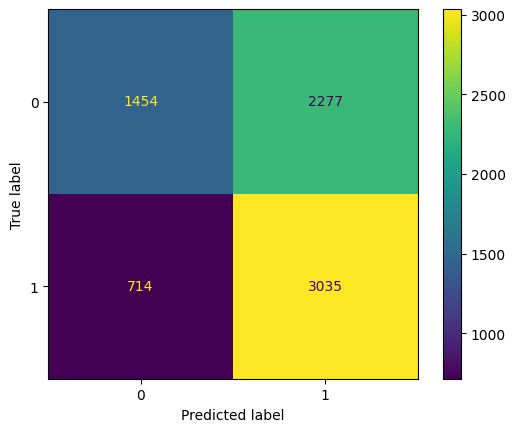

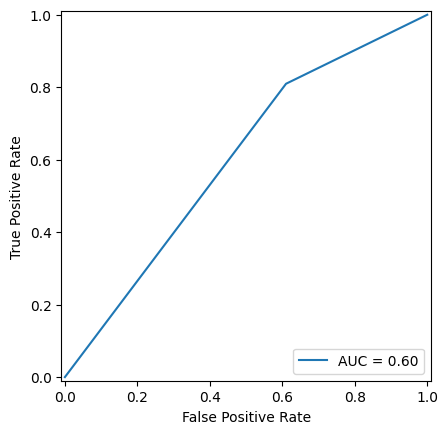

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    recall_score,
    auc,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    roc_curve,
)



log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(accuracy)
print(recall)
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=target_names
)
cm_display.plot()

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()

0.5955882352941176
0.7804747932782076


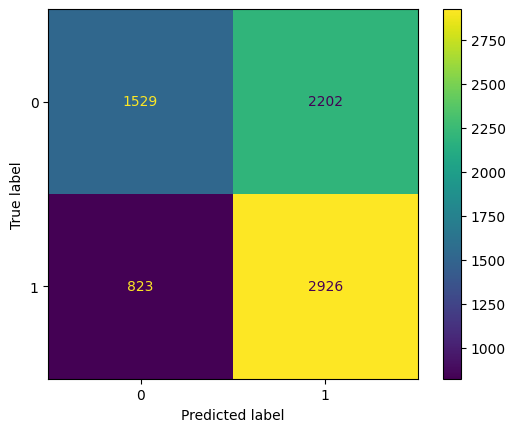

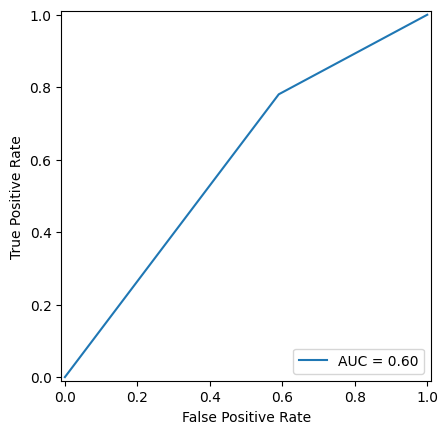

In [59]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(accuracy)
print(recall)
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=target_names
)
cm_display.plot()

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()